In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input


# TO ensure the GPU is present
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
  print('GPU is Available!')
else:
  print('GPU is Unavailable!')


GPU is Available!


In [8]:
# Load and explore the dataset
train_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir = '/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'


In [9]:
# List all the classes
classes = os.listdir(train_dir)
num_classes = len(classes)

# Display the class names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

Number of Classes: 2
Classes: ['nofire', 'fire']


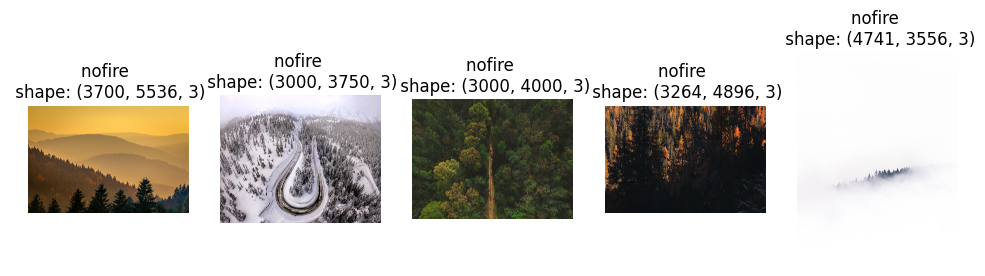

In [10]:
# Let's visualize the images in the dataset
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[0])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

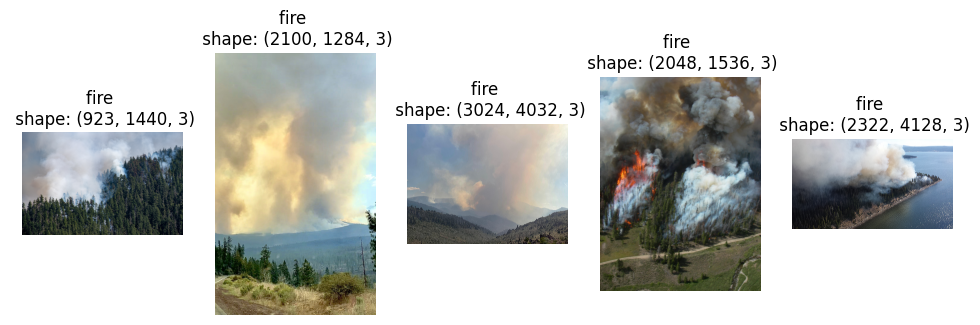

In [11]:
plt.figure(figsize=(12, 10))
for i in range(5):
  class_path = os.path.join(train_dir, classes[1])
  img_name = os.listdir(class_path)[i]
  img_path = os.path.join(class_path, img_name)
  img = plt.imread(img_path)

  plt.subplot(1, 5, i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]} \n shape: {img.shape}')
  plt.axis('off')
plt.show()

Dataset downloaded to: /kaggle/input/the-wildfire-dataset
✅ GPU available
🔥 Classes found: ['fire', 'nofire']


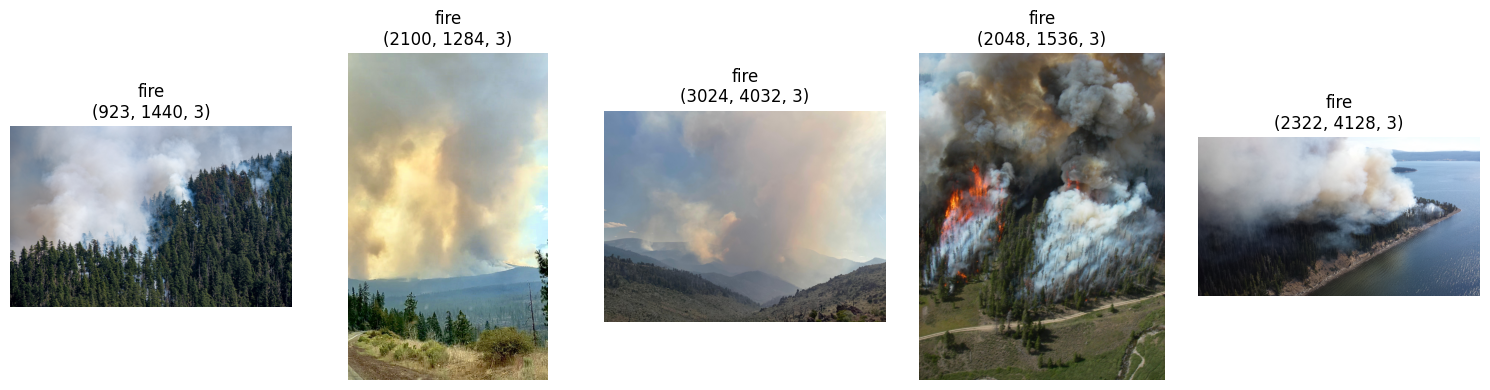

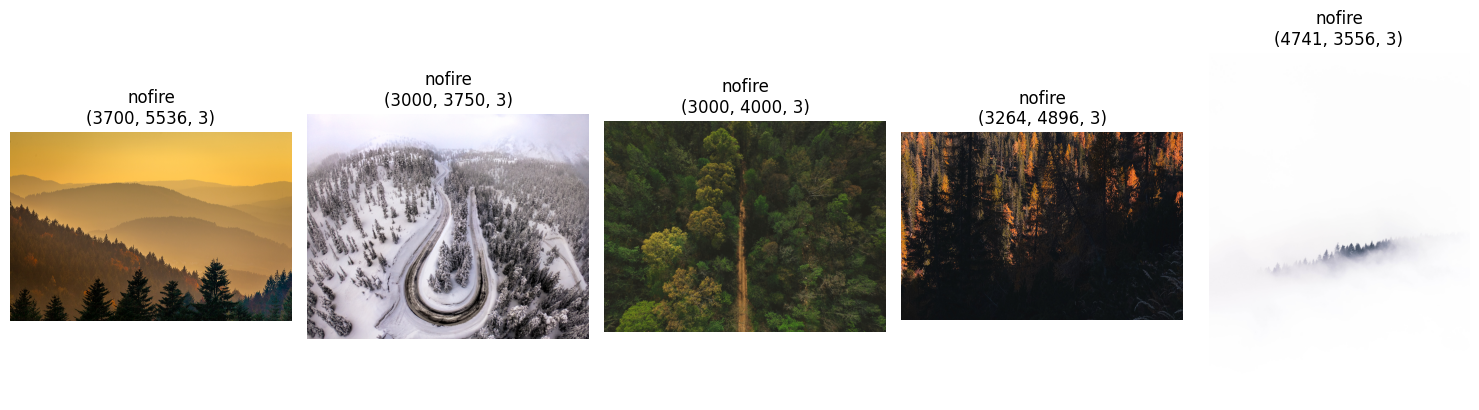

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,985 (42.61 MB)

 Trainable params: 11,169,537 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 7/59 ━━━━━━━━━━━━━━━━━━━━ 4:56 6s/step - accuracy: 0.6146 - loss: 6.7022

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


17/59 ━━━━━━━━━━━━━━━━━━━━ 4:43 7s/step - accuracy: 0.6333 - loss: 8.1774

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.6475 - loss: 6.9187

59/59 ━━━━━━━━━━━━━━━━━━━━ 601s 10s/step - accuracy: 0.6477 - loss: 6.8865 - val_accuracy: 0.4104 - val_loss: 4.8462 - learning_rate: 0.0010
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 503s 8s/step - accuracy: 0.7100 - loss: 2.3848 - val_accuracy: 0.3881 - val_loss: 14.8859 - learning_rate: 0.0010
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7179 - loss: 1.4073

59/59 ━━━━━━━━━━━━━━━━━━━━ 504s 8s/step - accuracy: 0.7178 - loss: 1.4091 - val_accuracy: 0.5100 - val_loss: 3.3682 - learning_rate: 0.0010
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6921 - loss: 1.2306

59/59 ━━━━━━━━━━━━━━━━━━━━ 476s 8s/step - accuracy: 0.6922 - loss: 1.2265 - val_accuracy: 0.4279 - val_loss: 2.5153 - learning_rate: 0.0010
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 458s 8s/step - accuracy: 0.7067 - loss: 0.7555 - val_accuracy: 0.5896 - val_loss: 2.9745 - learning_rate: 0.0010
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7150 - loss: 0.6733

59/59 ━━━━━━━━━━━━━━━━━━━━ 458s 8s/step - accuracy: 0.7150 - loss: 0.6729 - val_accuracy: 0.5697 - val_loss: 1.2669 - learning_rate: 0.0010
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7347 - loss: 0.5114

59/59 ━━━━━━━━━━━━━━━━━━━━ 509s 8s/step - accuracy: 0.7348 - loss: 0.5116 - val_accuracy: 0.5821 - val_loss: 0.8770 - learning_rate: 0.0010
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 470s 8s/step - accuracy: 0.7415 - loss: 0.6136 - val_accuracy: 0.6642 - val_loss: 1.0323 - learning_rate: 0.0010
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7288 - loss: 0.5636

59/59 ━━━━━━━━━━━━━━━━━━━━ 500s 8s/step - accuracy: 0.7290 - loss: 0.5643 - val_accuracy: 0.6343 - val_loss: 0.7853 - learning_rate: 0.0010
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 486s 8s/step - accuracy: 0.7247 - loss: 0.5648 - val_accuracy: 0.6915 - val_loss: 0.8385 - learning_rate: 0.0010
 5/13 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.8499 - loss: 0.8452

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (96631920 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (94487082 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


 6/13 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.8367 - loss: 0.8583

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (101859328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 99s 8s/step - accuracy: 0.7467 - loss: 0.8697
🎯 Test Accuracy: 64.63%


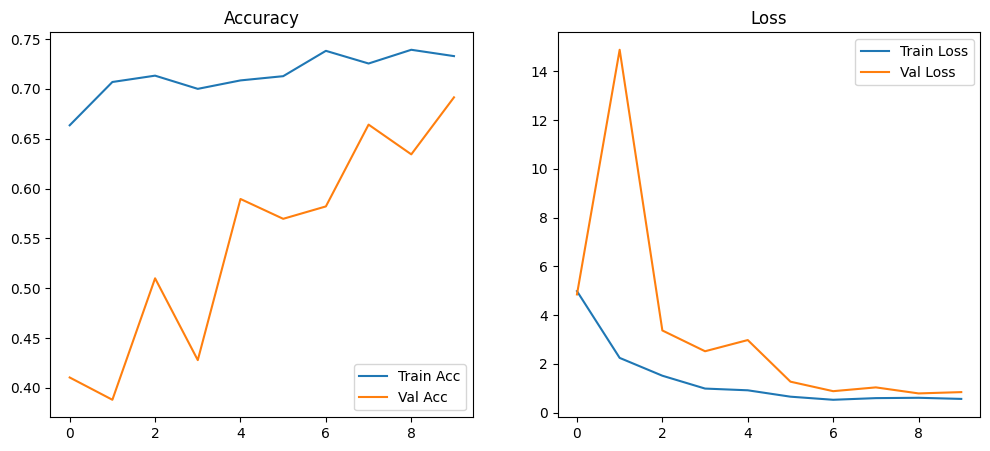

In [1]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Download dataset
dataset_path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
print("Dataset downloaded to:", dataset_path)

# Setup GPU growth
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print("✅ GPU available")
else:
    print("❌ GPU not found")

# Define paths
base_path = os.path.join(dataset_path, 'the_wildfire_dataset_2n_version')
train_dir = os.path.join(base_path, 'train')
val_dir = os.path.join(base_path, 'val')
test_dir = os.path.join(base_path, 'test')

# Class summary
classes = sorted(os.listdir(train_dir))
print(f"🔥 Classes found: {classes}")

# Visualize function
def show_sample_images(folder, label, num=5):
    plt.figure(figsize=(15, 4))
    img_files = os.listdir(folder)[:num]
    for i, fname in enumerate(img_files):
        img = plt.imread(os.path.join(folder, fname))
        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.title(f"{label}\n{img.shape}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Visuals
show_sample_images(os.path.join(train_dir, classes[0]), classes[0])
show_sample_images(os.path.join(train_dir, classes[1]), classes[1])

# Image dimensions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data generators with augmentation
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
val_data = val_test_gen.flow_from_directory(val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary')
test_data = val_test_gen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False)

# Model
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'), BatchNormalization(), MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'), BatchNormalization(), MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu'), BatchNormalization(), MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'), Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Callbacks
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.2, patience=3, verbose=1),
    ModelCheckpoint("wildfire_classifier.h5", save_best_only=True)
]

# Training
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    callbacks=callbacks
)

# Evaluate
loss, acc = model.evaluate(test_data)
print(f"🎯 Test Accuracy: {acc * 100:.2f}%")

# Plot history
def plot_metrics(hist):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Acc')
    plt.plot(hist.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

plot_metrics(history)
